In [7]:
import matplotlib.pyplot as plt
import uproot
print(f"uproot version: {uproot.__version__}")
import numpy as np
import pandas as pd

uproot version: 4.0.3


In [230]:
# file = uproot.open("root://131.225.204.161:1094//store/user/asterenb/DisplacedTaus/ntuples/v1/2017/SMS-TStauStau_lefthanded_mStau-225to250_TuneCP5_13TeV-madgraphMLM-pythia8/crab_ntuple_SMS_TStauStau_LH_mStau-225to250_2017/210211_080454/0000/merged/merged.root")
file = uproot.open("root://cmseos.fnal.gov//store/user/asterenb/DisplacedTaus/ntuples/v1/2018/ggH_HToSSTo4Tau_MH-125_TuneCP5_13TeV-powheg-pythia8/crab_ntuple_ggH_HToSSTo4Tau_2018/210211_080407/0000/merged/merged.root")
# file = uproot.open("root://cmseos.fnal.gov//store/user/asterenb/DisplacedTaus/ntuples/v1/2018/VBFH_HToSSTo4Tau_MH-125_TuneCP5_13TeV-powheg-pythia8/crab_ntuple_VBFH_HToSSTo4Tau_2018/210211_080419/0000/merged/merged.root")

In [231]:
trig_results = []
for i in np.arange(60):
    trig_results.append(file["ntuples"]["recoT"].arrays([f"trig{i}"], f"trig{i} == {hex(2**i)}", \
                                                        aliases={f"trig{i}": f"trig_fired & {hex(2**i)}"}))

In [232]:
num_events = len(file["ntuples"]["recoT"].arrays("trig_fired"))
num_events

553236

In [233]:
num_triggered = np.array([len(trig_results[i]) for i in np.arange(len(trig_results))])
num_triggered

array([5338,  956,  682,  236,  133,  200,  166,  333,  317,  293,  266,
        560,  194, 1487, 1446, 1364, 1280, 1703, 1586,  884,  742,  671,
        696,  240, 1109,  921,  884,   40,    6,    0,    0,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1])

In [234]:
trig_effs = [100*size/num_events for size in num_triggered]
trig_effs

[0.9648685190406987,
 0.17280148074239565,
 0.12327469651288057,
 0.042658106124691814,
 0.024040373366881404,
 0.03615093739380662,
 0.030005278036859494,
 0.060191310760688024,
 0.05729923576918349,
 0.0529611232819267,
 0.04808074673376281,
 0.10122262470265854,
 0.03506640927199242,
 0.2687822195229522,
 0.2613712773572219,
 0.24654939302576115,
 0.23136599932036236,
 0.3078252319082634,
 0.28667693353288654,
 0.15978714328062527,
 0.13411997773102258,
 0.12128639495622122,
 0.12580526213044704,
 0.04338112487256795,
 0.20045694784865772,
 0.1664750666984795,
 0.15978714328062527,
 0.007230187478761324,
 0.0010845281218141987,
 0.0,
 0.0,
 0.0001807546869690331,
 0.0001807546869690331,
 0.0001807546869690331,
 0.0001807546869690331,
 0.0001807546869690331,
 0.0001807546869690331,
 0.0001807546869690331,
 0.0001807546869690331,
 0.0001807546869690331,
 0.0001807546869690331,
 0.0001807546869690331,
 0.0001807546869690331,
 0.0001807546869690331,
 0.0001807546869690331,
 0.0001807546

Text(0, 0.5, 'Trigger efficiency (%)')

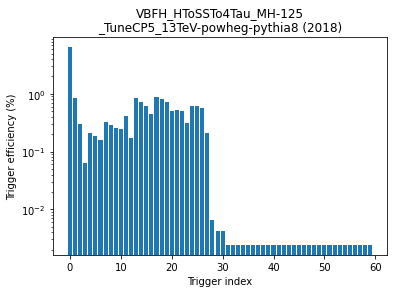

In [220]:
plt.bar(np.arange(60), trig_effs, log=True)
plt.title('VBFH_HToSSTo4Tau_MH-125\n_TuneCP5_13TeV-powheg-pythia8 (2018)')
plt.xlabel('Trigger index')
plt.ylabel('Trigger efficiency (%)')

Text(0, 0.5, 'Trigger efficiency (%)')

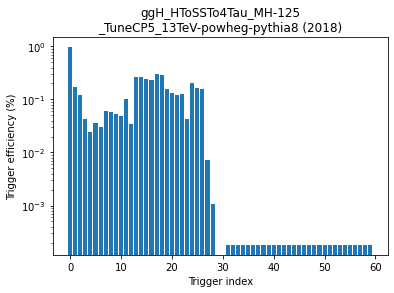

In [235]:
plt.bar(np.arange(60), trig_effs, log=True)
plt.title('ggH_HToSSTo4Tau_MH-125\n_TuneCP5_13TeV-powheg-pythia8 (2018)')
plt.xlabel('Trigger index')
plt.ylabel('Trigger efficiency (%)')

Text(0, 0.5, 'Trigger efficiency (%)')

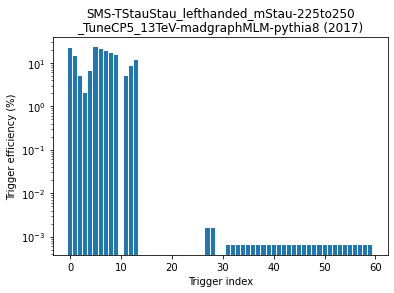

In [212]:
plt.bar(np.arange(60), trig_effs, log=True)
plt.title('SMS-TStauStau_lefthanded_mStau-225to250\n_TuneCP5_13TeV-madgraphMLM-pythia8 (2017)')
plt.xlabel('Trigger index')
plt.ylabel('Trigger efficiency (%)')

In [236]:
indices = np.arange(60)
triplets = [[round(eff,1),num_trig,index] for eff, num_trig, index in zip(trig_effs, num_triggered, indices)]

In [237]:
sorted(triplets, reverse=True)[0:10]

[[1.0, 5338, 0],
 [0.3, 1703, 17],
 [0.3, 1586, 18],
 [0.3, 1487, 13],
 [0.3, 1446, 14],
 [0.2, 1364, 15],
 [0.2, 1280, 16],
 [0.2, 1109, 24],
 [0.2, 956, 1],
 [0.2, 921, 25]]